Compiler test

In [ ]:
import matplotlib.pyplot as plt
import os

# Create a directory to store figures
os.makedirs("figures", exist_ok=True)

# Counter for unique filenames
fig_counter = 0

def my_show(*args, **kwargs):
    global fig_counter
    # Create a filename based on the counter
    filename = os.path.join("figures", f"figure_compiler_test_{fig_counter}.png")
    plt.savefig(filename, bbox_inches="tight")
    plt.close()  # Optionally close the figure after saving
    print(f"Figure saved as {filename}")
    fig_counter += 1

# Override plt.show with our custom function
plt.show = my_show

In [ ]:


import simtool.simtool as simtool

# Run all builds with a problem size L=1000
df_results = simtool.compiler_test(500)
print(df_results)
df_results.to_csv('compiler_test_full.csv')


Building preset 'gcc-O3' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/gcc-O3_384 ...
Building preset 'clang-O3' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/clang-O3_384 ...
Building preset 'icx-O3' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/icx-O3_384 ...
Building preset 'gcc-O3-march-native' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/gcc-O3-march-native_384 ...
Building preset 'clang-O3-march-native' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/clang-O3-march-native_384 ...
Building preset 'icx-O3-march-native' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/icx-O3-march-native_384 ...
Building preset 'gcc-O2' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/gcc-O2_384 ...
Building preset 'clang-O2' for L=384 in

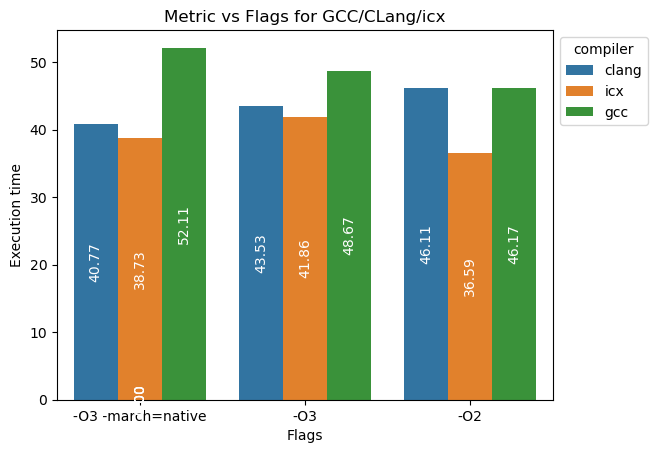

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.barplot(x='optimization_flags', y='metric', hue='compiler',legend='full',  data=df_results)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Add labels with the value of each bar
for rect in ax.patches:
    # Get the height and width of the bar
    height = rect.get_height()
    width = rect.get_width()

    # Get the x and y coordinates of the bar
    x = rect.get_x()
    y = rect.get_y()

    # Add a label with the value of the bar
    ax.text(x + width/2, y + height/2, '{:.2f}'.format(height), ha='center', va='center', color='white', rotation=90)
    

# Set the plot title and axis labels
plt.title('Metric vs Flags for GCC/CLang/icx')
plt.xlabel('Flags')
plt.ylabel('Execution time')


# plt.xticks(df.L.unique(), rotation=90)

# Show the plot
plt.show()